# Project Proposal


## Introduction
Rice is one of the most popular grain products in the world and it plays an important role in both nutrition and cultural and regional agriculture. There are many species of rice that are grown in different countries and different species can be distinguished by many characteristics such as physical properties, cooking features, taste, and others. These characteristics are usually used for quality criteria examination or determination of various types. However, it might be inefficient to proceed using some of these characteristics. Therefore, according to many studies, physical properties are found to be useful and less time-consuming.

In our project, we will concentrate on the prediction of different rice types based on information on the appearance of the rice and its accuracy. We will focus on two rice species in Turkey—Osmancik and Cammeo—as well as several physical properties of each species. In general, these two species are distinct in shape, texture, and color. This thus poses the question:

**What is the classification accuracy of using the K-Nearest Neighbors model to predict that rice is Osmancik or Cammeo?**

We will seek to answer this question by using the Rice (Cammeo and Osmancik) Data Set. This data set includes certified rice samples in both species collected by Ilkay Cinar and Murat Koklu in Turkey. The data was obtained and calculated by taking images of the two species. It contains seven numeric variables: Area, Perimeter, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, and Extent, and one categorical variable: Class.

## Preliminary exploratory data analysis

In [11]:
# Import packages
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(gridExtra)

Firstly, read the data, and obtain a general glimpse on it.  

In [21]:
url = "https://www.muratkoklu.com/datasets/vtdhnd03.php"
dataset = "rice_dataset.xlsx"
download.file(url, dataset)
rice <- read_excel("rice_dataset.xlsx")
head(rice)
glimpse(rice)
any(is.na(rice))

AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
15231,525.579,229.7499,85.09379,0.9288820,15617,0.5728955,Cammeo
14656,494.311,206.0201,91.73097,0.8954050,15072,0.6154363,Cammeo
14634,501.122,214.1068,87.76829,0.9121181,14954,0.6932588,Cammeo
13176,458.343,193.3374,87.44839,0.8918609,13368,0.6406690,Cammeo
14688,507.167,211.7434,89.31245,0.9066909,15262,0.6460239,Cammeo
13479,477.016,200.0531,86.65029,0.9013283,13786,0.6578973,Cammeo


Rows: 3,810
Columns: 8
$ AREA         <dbl> 15231, 14656, 14634, 13176, 14688, 13479, 15757, 16405, …
$ PERIMETER    <dbl> 525.579, 494.311, 501.122, 458.343, 507.167, 477.016, 50…
$ MAJORAXIS    <dbl> 229.7499, 206.0201, 214.1068, 193.3374, 211.7434, 200.05…
$ MINORAXIS    <dbl> 85.09379, 91.73097, 87.76829, 87.44839, 89.31245, 86.650…
$ ECCENTRICITY <dbl> 0.9288820, 0.8954050, 0.9121181, 0.8918609, 0.9066909, 0…
$ CONVEX_AREA  <dbl> 15617, 15072, 14954, 13368, 15262, 13786, 16150, 16837, …
$ EXTENT       <dbl> 0.5728955, 0.6154363, 0.6932588, 0.6406690, 0.6460239, 0…
$ CLASS        <chr> "Cammeo", "Cammeo", "Cammeo", "Cammeo", "Cammeo", "Camme…


[1] FALSE

It is shown that the data can be read into R, and there is no NA in the dataset.
Additionally, the data seems to be already tidy. It fulfills the requirements that there is one observation per row, one variable per column, and one value per cell.

The next step is to split the data into training set and testing set. We will use 75% of the data to build the training set because we want to use more data to train in order to get a more accurate model. The remaining 25% of the data will be the testing set.

In [22]:
set.seed(1)
rice_split <- initial_split(rice, prop = 0.75, strata = CLASS)
rice_train <- training(rice_split)
rice_test <- testing(rice_split)

In addition, we will make a summary of the training set before explore it further more.

In [23]:
rice_train_summary <- rice_train %>%
    group_by(CLASS) %>%
    summarize(n = n(), mean_area = mean(AREA), mean_perimeter = mean(PERIMETER), 
              mean_majoraxis = mean(MAJORAXIS), mean_eccentricity = mean(ECCENTRICITY), 
              mean_convex_area = mean(CONVEX_AREA), mean_extent = mean(EXTENT))
rice_train_summary

`summarise()` ungrouping output (override with `.groups` argument)



CLASS,n,mean_area,mean_perimeter,mean_majoraxis,mean_eccentricity,mean_convex_area,mean_extent
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cammeo,1223,14154.65,487.2135,205.3067,0.900838,14487.39,0.6511316
Osmancik,1635,11535.21,429.1657,176.2292,0.876432,11784.54,0.6702400


In order to make the prediction, selecting predictors is essential for the analysis. Before that, we will visualize the data first.

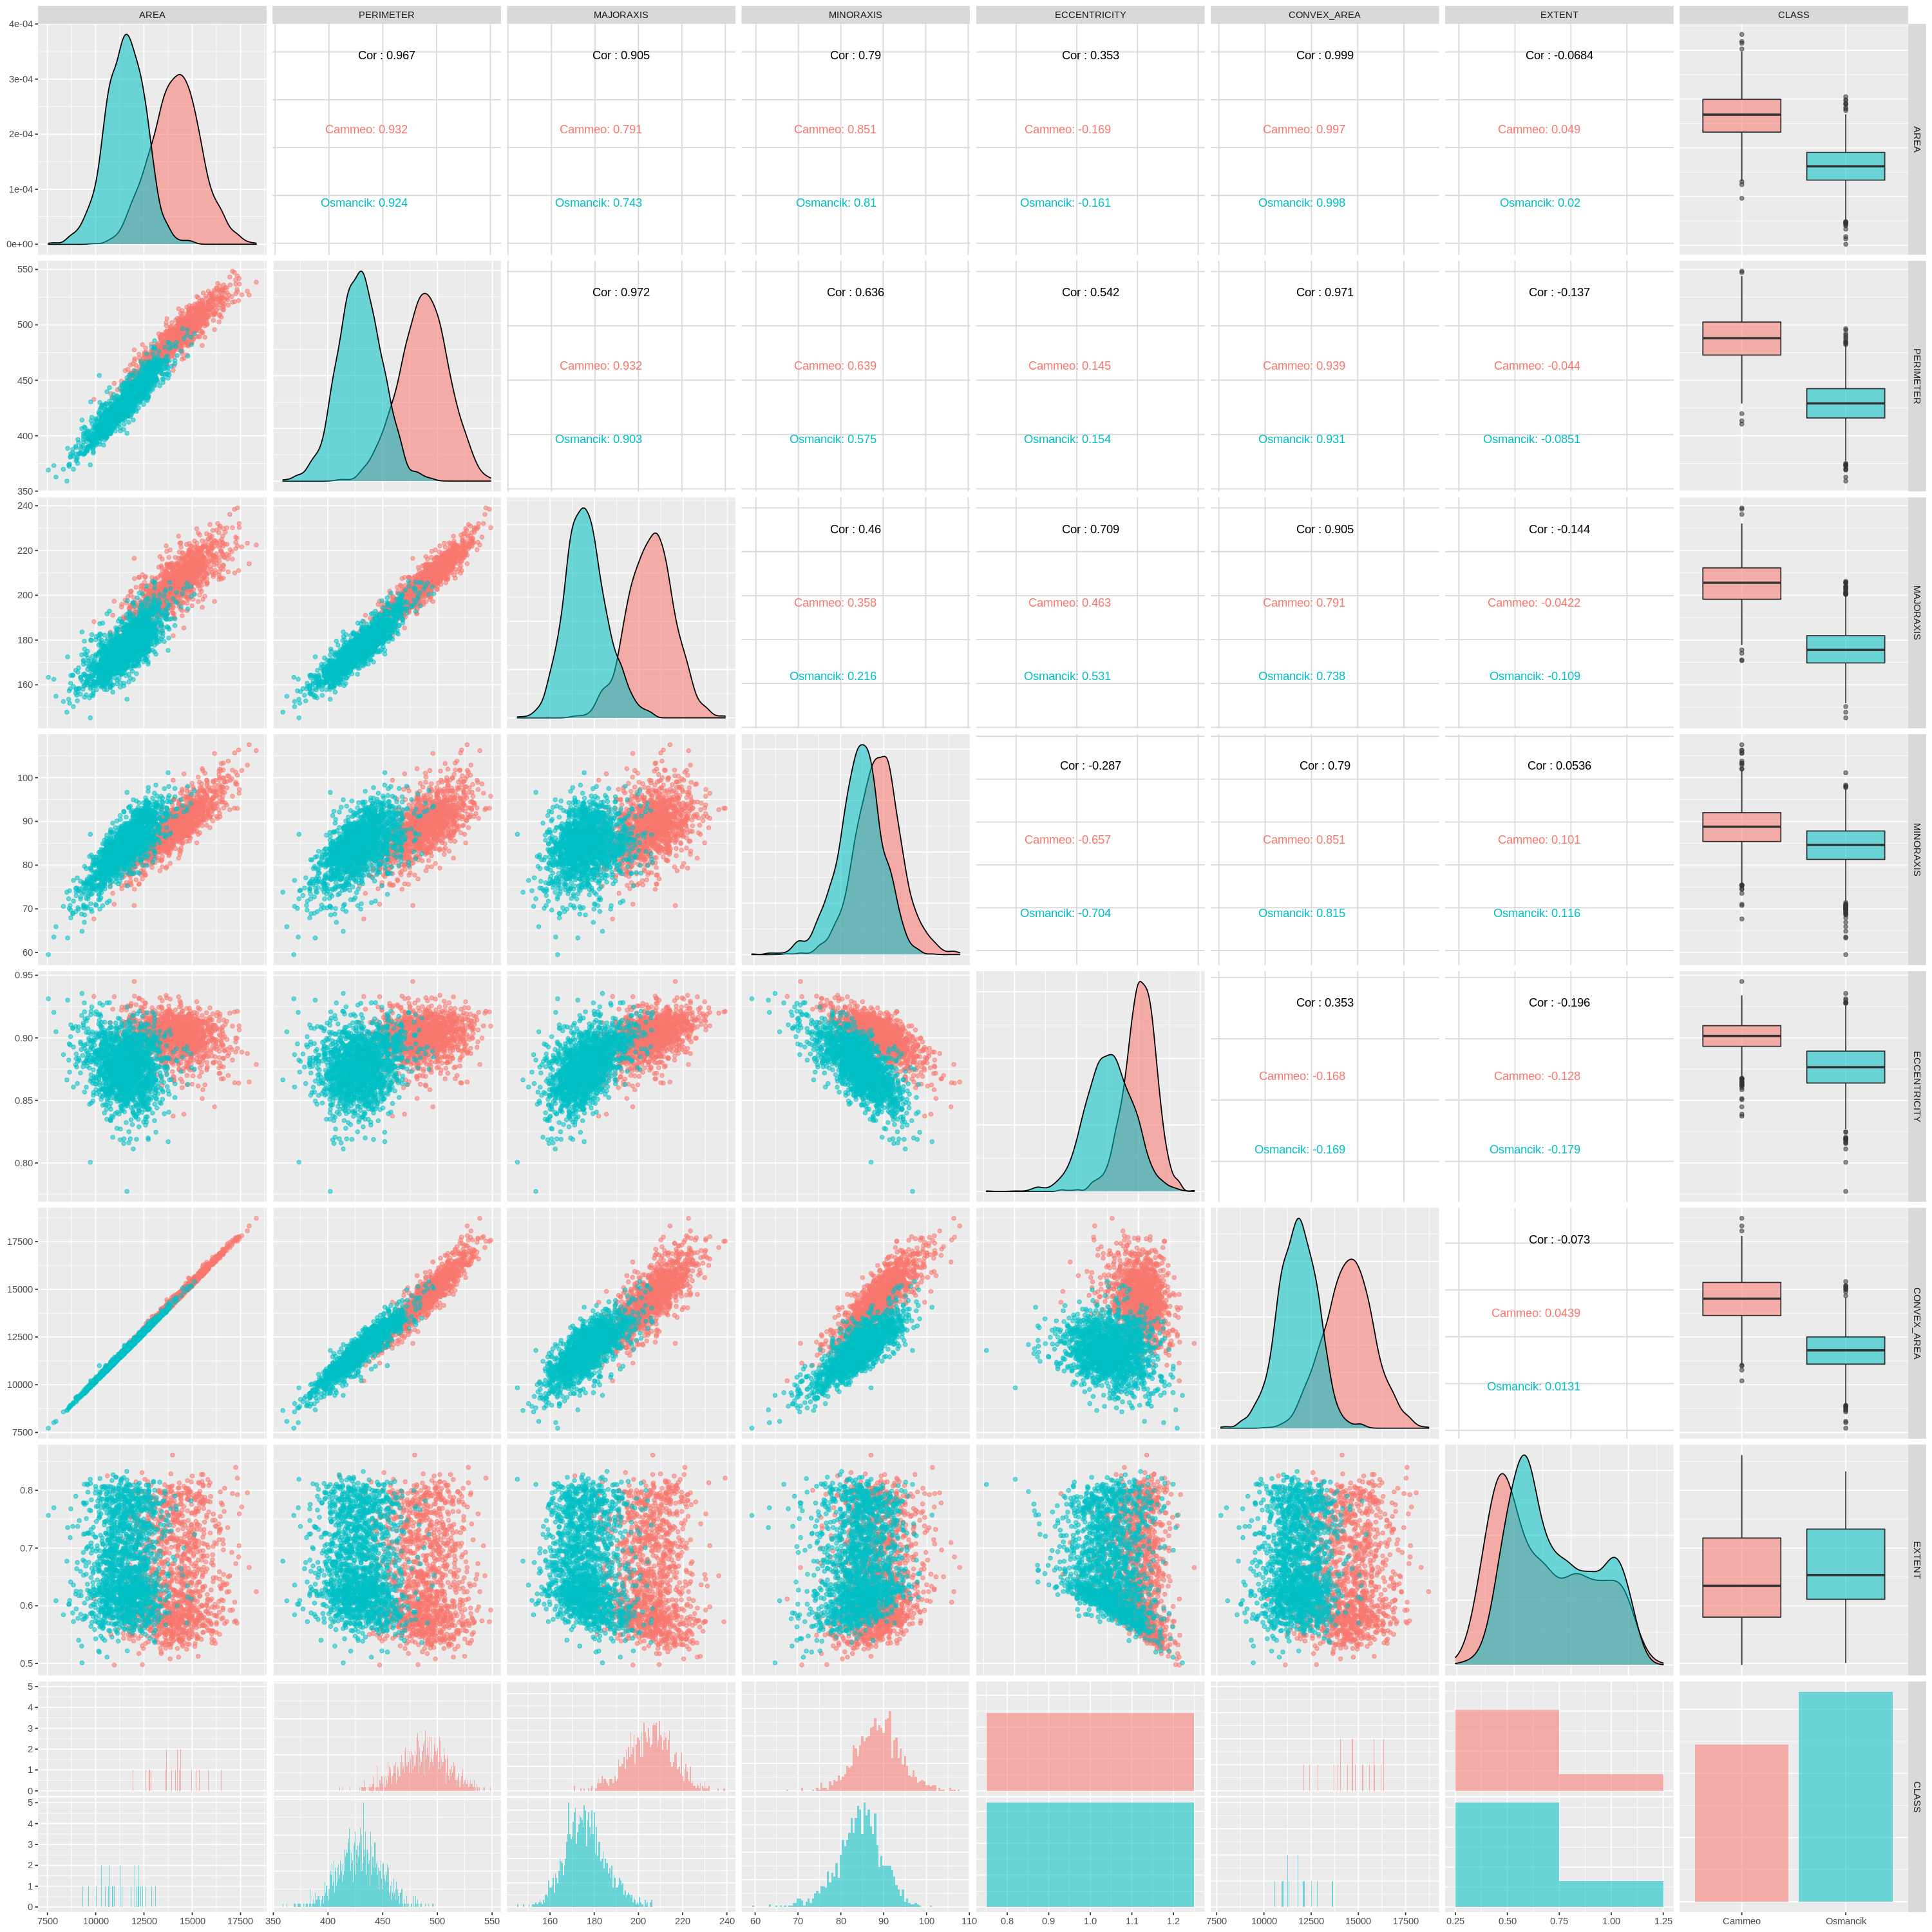

In [24]:
options(repr.plot.width=25, repr.plot.height=25)
rice_pairs <- rice_train %>%
  ggpairs(mapping = ggplot2::aes(colour = CLASS, alpha = 0.9), lower=list(combo=wrap("facethist",  
binwidth=0.5)))
rice_pairs

## Method

We will train the KNN model to predict and test the accuracy of the model. To obtain the K value of the model, we will tune the classifier based on the training set and then select the best K. After applying the K to the model and training, we will use the testing set to calculate the accuracy of the trained model. To make the prediction more accurate, selecting predictors is essential. Based on the training set's visualization, we choose all the numerical variables except EXTENT as the predictors. This is because, in the ggpairs plot, it is hard to distinguish two rice species using EXTENT since the overlapping area of two colors is relatively large.

To visualize our result, we will create a line plot of possible K values for selection. We will also create multiple scatter plots with the background color on each pair of predictors to show the predicted area of each rice species on the plot. It is also beneficial for analyzing the potential error in K value selection. Moreover, we will also create a confusion matrix of the test result to present the prediction errors.

## Expected Outcomes and Significance

We expect to find the best K value and the accuracy of the trained KNN model. If the prediction is accurate enough, many processes can be designed based on classification, such as examining rice types. However, there might be better and more precise prediction methods than the KNN model. How to find them and how accurate they are will be the questions worth further study.